Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

Data Loading/Feature Engineering/Visualization

In [2]:
tumor_df = load_breast_cancer()
df = pd.DataFrame(tumor_df.data, columns=tumor_df.feature_names)
df['target'] = tumor_df.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
#sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

In [ ]:
# plt.figure(figsize=(20,12))
# sns.heatmap(df.corr(), annot=True)

Training and Testing

In [3]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

Building Basic SVM

In [4]:
clf_svm = SVC()
clf_svm.fit(X_train_scaled,y_train)

SVC()

In [6]:
confusion_matrix(y_test, clf_svm.predict(X_test_scaled))

array([[ 60,   0],
       [  5, 106]])

Optimizing Parameters with Cross Validation and GridSearchCV

In [7]:
param_grid = [
    {'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
    ]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
c = optimal_params.best_params_['C']
gamma = optimal_params.best_params_['gamma']
kernel = optimal_params.best_params_['kernel']

print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Building SVM with Optimal Params

In [8]:
clf_svm = SVC(C=10, gamma=0.01, kernel='rbf')
clf_svm.fit(X_train_scaled,y_train)

SVC(C=10, gamma=0.01)

In [9]:
confusion_matrix(y_test, clf_svm.predict(X_test_scaled))

array([[ 60,   0],
       [  5, 106]])

Reducing Dimensionality with PCA

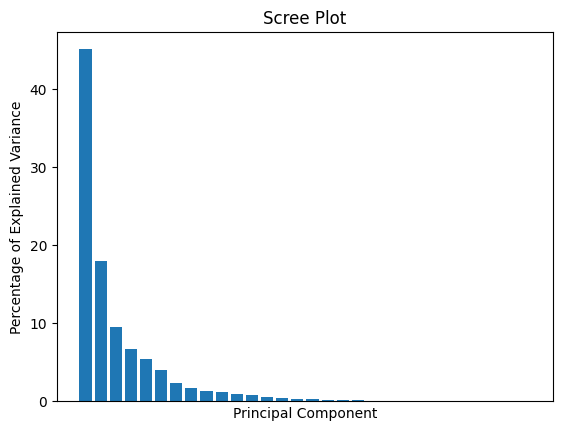

In [10]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = [
    {'C': [0.5, 1, 10, 100],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']}
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train_pca, y_train)
c = optimal_params.best_params_['C']
gamma = optimal_params.best_params_['gamma']
kernel = optimal_params.best_params_['kernel']

print(optimal_params.best_params_)

{'C': 0.5, 'gamma': 0.0001, 'kernel': 'rbf'}


In [17]:
clf_svm_pca = SVC(C=0.5, gamma=0.0001, kernel='rbf')
clf_svm_pca.fit(X_train_pca, y_train)
train_score = clf_svm_pca.score(X_train_pca, y_train)
train_score

0.9422110552763819

In [20]:
# train_pc1_coords = X_train_pca[:, 0]
# train_pc2_coords = X_train_pca[:, 1]

# pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))
# x_test_pca = pca.transform(X_train_scaled)

# param_grid = [
#     {'C': [0.5, 1, 10, 100],
#         'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
#         'kernel': ['rbf']}
# ]

# optimal_params = GridSearchCV(
#     SVC(),
#     param_grid,
#     cv=5,
#     scoring='accuracy',
#     verbose=0
# )

# optimal_params.fit(pca_train_scaled, y_train)
# c = optimal_params.best_params_['C']
# gamma = optimal_params.best_params_['gamma']
# kernel = optimal_params.best_params_['kernel']

# print(optimal_params.best_params_)

In [19]:
# from sklearn import metrics

# clf_svm = SVC(C=100, gamma=0.001, kernel='rbf')
# clf_svm.fit(pca_train_scaled, y_train)
# #confusion_matrix(y_test, clf_svm.predict(x_test_pca))
# y_pred = clf_svm.predict(x_test_pca)
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Drawing SVM Graph

In [ ]:
# clf_svm = SVC(C=0.5, gamma=0.0001)
# clf_svm.fit(pca_train_scaled, y_train)

# x_test_pca = pca.transform(X_train_scaled)
# test_pc1_coords = x_test_pca[:, 0]
# test_pc2_coords = x_test_pca[:, 1]

# x_min = test_pc1_coords.min() - 1
# x_max = test_pc1_coords.max() + 1

# y_min = test_pc2_coords.min() - 1
# y_max = test_pc2_coords.max() + 1

# xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
#                      np.arange(start=y_min, stop=y_max, step=0.1))

# Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

# Z = Z.reshape(xx.shape)
# fig, ax = plt.subplots(figsize=(10,10))
# ax.contourf(xx, yy, Z, alpha=0.1)
# cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

# scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, cmap=cmap, s=100, edgecolors='k', alpha=0.7)

# legend = ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc='upper right')
# legend.get_texts()[0].set_text('Benign')
# legend.get_texts()[1].set_text('Malignant')


# ax.set_ylabel('PC2')
# ax.set_xlabel('PC1')   
# ax.set_title('Decision surface using the PCA transformed/projected features')
# plt.show()